# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 

More information about the dataset is in the data folder, labeled student.txt

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
df2 = pd.read_csv("data\student-mat.csv", sep = ";")
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = df1.iloc[:, 32:]
X.dropna()
y.dropna()

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape) #Checking the shape of the features
    
    return X

In [5]:
X_fixed = fixingfile(X)
#X_fixed.to_csv("portfix.csv") 
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)


(649, 26)


In [6]:
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(X))

In [7]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Linear Regression

## 1. Multiple Linear Regression

In [8]:
#reshaping ys to 2d
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0],1)
print("Checking y_2d_train is in 2d:", y_2d_train.shape)
print("Checking y_2d_test is in 2d:", y_2d_test.shape)

Checking y_2d_train is in 2d: (389, 1)
Checking y_2d_test is in 2d: (260, 1)


In [9]:
n_train = y_2d_train.shape[0]
n_test = y_2d_test.shape[0]
print("Number training of rows:", n_train)
print("Number testing of rows:", n_test)

Number training of rows: 389
Number testing of rows: 260


In [10]:
# Adding the column of ones infront of x_train
ones_train = np.ones((n_train, 1))
X_1_train = np.hstack((ones_train, X_train))
print("X_1 shape:", X_1_train.shape)
print("X_1 with ones: ", X_1_train)

X_1 shape: (389, 27)
X_1 with ones:  [[ 1.          0.73094388 -1.19993734 ...  2.11905063  0.32093018
   0.93602618]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466 -0.3710422
   0.50472977]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466 -1.06301457
   0.07343336]
 ...
 [ 1.          0.73094388 -1.19993734 ... -0.99769466 -0.3710422
   1.36732259]
 [ 1.          0.73094388 -1.19993734 ... -0.99769466  0.32093018
  -0.78915946]
 [ 1.          0.73094388  0.83337685 ... -0.21850834 -1.06301457
  -0.78915946]]


In [11]:
def compute_cost(X_1, y_2d, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    
    # TODO Q07 - Taken from hw
    # Write the cost function
    #ISSUES: X AND Y ARE NOW 2D ARRAYS
    cost = sum((y_2d- (np.dot(X_1, w)))**2)/(2*N)
    
    return cost[0]

In [12]:
def gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters):
    # In place of ellipsis, write the updated value of w0 in temp0 and of w1 in temp1
    # TODO Q08
    # Finish the gradient descent function
    
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        slope = np.dot(X_1, w)
        der_vector = np.dot(X_1.T,(slope - y_2d))
        w = w - (learning_rate * (1/N)) * der_vector
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [13]:
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000)
print(g)
print("g[0]: ", g[0][0])

[[ 1.17277586e+01]
 [ 5.99651770e-01]
 [ 3.68801793e-01]
 [ 7.13962136e-02]
 [ 2.41013719e-01]
 [ 1.21862312e-01]
 [ 4.10864948e-02]
 [ 1.33368928e-01]
 [ 3.12089956e-01]
 [-3.40139014e-02]
 [ 3.68744328e-01]
 [-7.38927167e-01]
 [-5.24091048e-01]
 [ 5.30600520e-02]
 [-5.77691295e-02]
 [ 2.83802699e-02]
 [-2.42741785e-01]
 [ 4.30051484e-01]
 [ 2.66051553e-01]
 [-2.93074361e-01]
 [-1.18210715e-01]
 [-1.28308708e-01]
 [-2.58777820e-03]
 [-3.30869393e-01]
 [-1.17830430e-01]
 [-2.55029966e-01]
 [-1.56722390e-01]]
g[0]:  11.727758559214877


In [14]:
def multiple_linear_reg_model_gda(X_1, y_2d, learning_rate, N, num_iters):
    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    # TODO 09 
    # Complete the function
    w = np.zeros((X_1.shape[1],1))
    
    # Calculate the initial cost by calling the function you coded above.
    initial_cost = compute_cost(X_1, y_2d, w, N)
    
    # Calculate the optimized value of gradients by calling the gradient_descent function coded above
    w = gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    final_cost = compute_cost(X_1, y_2d, w, N)

    return w, initial_cost, final_cost

In [15]:
def runningtest(X_run, y_run, num_rows):
    #Testing numbers on training set
    learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]
    num_iters = [10,100, 1000, 10000]
    track = {}
    best_rsq = 0
    for nums in num_iters:
        print("*"* 50)
        print(nums)
        for alpha in learning_rate:
            results = multiple_linear_reg_model_gda(X_run, y_run, alpha, n_train, nums)
            print("Iter is:", nums, "Alpha is:", alpha)
            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            #print('-'*50)
            rss = 0
            tss = 0
            for i in range(n_train):
                rss += (np.dot(results[0].T,X_run[i])-y_run[i])**2
            tss = np.sum((y_run-np.mean(y_run))**2 )# TSS 
            #print("RSS:",rss,"TSS:", tss)
            rsq = 1 - (rss/tss)
            print(rsq)
            if rsq > best_rsq:
                best_rsq = rsq
                track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq": rsq}
            print('-'*50)
        print("*"* 50)
    return track

In [16]:
#Running test
track = runningtest(X_1_train, y_2d_train, n_train)

**************************************************
10
Iter is: 10 Alpha is: 0.01

initial cost:  75.7159383033419 
final cost:  62.07485897781467
[-10.62098399]
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  75.7159383033419 
final cost:  28.757642022669913
[-4.38369483]
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  75.7159383033419 
final cost:  74.21937427143492
[-12.89454884]
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  75.7159383033419 
final cost:  68.67442649783013
[-11.85648367]
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  75.7159383033419 
final cost:  68.53813310260956
[-11.83096829]
--------------------------------------------------
Iter is: 10 Alpha is: 0.0001

initial cost:  75.7159383033419 
final cost:  75.56485939071023
[-13.14643602]
-------------------------------------------

In [17]:
# The best rsq on training set based off gradient method
print("Best rsq based off the testing different iters and alpha:")
for i in track.items():
    print(i[0],": ",i[1] )

Best rsq based off the testing different iters and alpha:
(10000, 0.05) :  (array([[ 1.18382077e+01],
       [ 6.85174381e-01],
       [ 4.29661332e-01],
       [ 5.47204562e-02],
       [ 2.42525994e-01],
       [ 1.18438171e-01],
       [ 2.28132155e-02],
       [ 9.68573550e-02],
       [ 3.59570475e-01],
       [-2.54049564e-02],
       [ 3.41694000e-01],
       [-7.07975591e-01],
       [-5.56216668e-01],
       [ 3.27090805e-02],
       [-2.13168058e-02],
       [-2.71039957e-03],
       [-2.42859320e-01],
       [ 4.30016255e-01],
       [ 2.39742092e-01],
       [-2.68802190e-01],
       [-9.83727206e-02],
       [-1.09527340e-01],
       [ 3.70212930e-03],
       [-2.71518200e-01],
       [-1.19670376e-01],
       [-2.63234372e-01],
       [-2.12638677e-01]]), 75.7159383033419, 3.555018627595439)
RSS :  [2765.80449227]
TSS :  4155.778920308483
rsq :  [0.33446785]


# Using sklearn library to calculate

In [18]:
#Creating our regression
regr = linear_model.LinearRegression()
regr.fit(X_train,y_2d_train)

LinearRegression()

In [19]:
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
print('The rsq(r^2) = ', regr.score(X_train, y_2d_train))

The intercept w0 =  [11.8382077]
The coefficients w[1..d]= [[ 0.68517438  0.42966133  0.05472046  0.24252599  0.11843817  0.02281322
   0.09685736  0.35957048 -0.02540496  0.341694   -0.70797559 -0.55621667
   0.03270908 -0.02131681 -0.0027104  -0.24285932  0.43001626  0.23974209
  -0.26880219 -0.09837272 -0.10952734  0.00370213 -0.2715182  -0.11967038
  -0.26323437 -0.21263868]]
The rsq(r^2) =  0.3344678469893323


In [20]:
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_tr_pred-y_train)**2)
TSS = np.sum((y_train - np.mean(y_train))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/y_train.shape[0]))
print("RMSE = {0:f}".format(np.sqrt(RSS/y_train.shape[0])))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 2765.804492
Ein = 7.110037
RMSE = 2.666465
R^2 = 0.334468


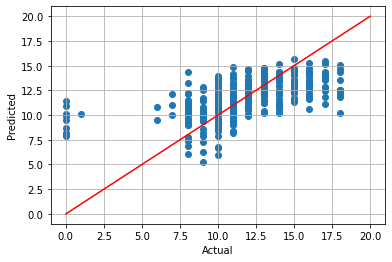

In [21]:
plt.scatter(y_train,y_tr_pred)
#Set to 20, because maximum score for y is 20
plt.plot([0, 20],[0, 20],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

# Validating over the testing set

In [22]:
y_test_pred = regr.predict(X_test)
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_test_pred-y_test)**2)
TSS = np.sum((y_test - np.mean(y_test))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/n_test))
print("RMSE = {0:f}".format(np.sqrt(RSS/n_test)))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 1813.751998
Ein = 6.975969
RMSE = 2.641206
R^2 = 0.303943


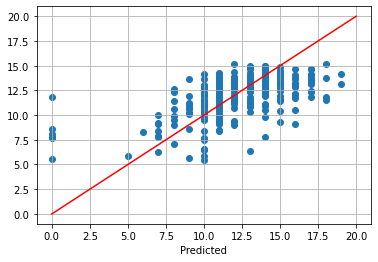

In [23]:
plt.scatter(y_test,y_test_pred)
plt.plot([0,20],[0,20],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

# Attempting to use regularization in hopes of getting better rsq values
### Will be using the sklearn regularization library, below is the link to the library
### https://scikit-learn.org/stable/modules/linear_model.html

# ridge regression

In [24]:
def ridge(X_ridge, y_ridge):
    lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
    rsq = {}
    for l in lamda:
        ridgereg = linear_model.Ridge(alpha = l)
        ridgereg.fit(X_ridge, y_ridge)
        #print('The intercept w0 = ', ridgereg.intercept_)
        #print('The coefficients w[1..d]=', ridgereg.coef_)
        #print('The rsq(r^2) = ', ridgereg.score(X_ridge, y_ridge))
        #print('-'* 70)
        rsq[l] = ridgereg.score(X_ridge, y_ridge)
    return rsq

In [25]:
rsq_train = ridge(X_train, y_2d_train) #Couldn't use x_1_train due to matrix size difference
rsq_test = ridge(X_test, y_2d_test) 
print("Ridge library on training set: ", rsq_train)
print("*"*60)
print("Ridge library on testing set: ", rsq_test)


Ridge library on training set:  {0.001: 0.33446784698791154, 0.01: 0.33446784684725983, 0.1: 0.3344678327907873, 0.5: 0.33446749298810174, 1: 0.3344664357684566, 10: 0.3343348390561528, 100: 0.32616291093393057}
************************************************************
Ridge library on testing set:  {0.001: 0.42731304024514116, 0.01: 0.42731303989280534, 0.1: 0.4273130046933008, 0.5: 0.42731215513595033, 1: 0.42730951848426224, 10: 0.4269915137398438, 100: 0.4106565811065871}


## Multiple regression with Lasso

In [26]:
def lasso(X_lasso, y_lasso):
    lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
    rsq = {}
    for l in lamda:
        lasso_reg = linear_model.Lasso(alpha = l)
        lasso_reg.fit(X_lasso, y_lasso)
        #print('The intercept w0 = ', regr.intercept_)
        #print('The coefficients w[1..d]=', regr.coef_)
        #print('The rsq(r^2) = ', lasso_reg.score(X_train, y_2d_train))
        #print('-'* 70)
        rsq[l] = lasso_reg.score(X_lasso, y_lasso)
    return rsq

In [27]:
rsq_lasso_train = lasso(X_train, y_2d_train) #Couldn't use x_1_train due to matrix size difference
rsq_lasso_test = lasso(X_test, y_2d_test) 
print("Ridge library on training set: ", rsq_lasso_train)
print("*"*60)
print("Ridge library on testing set: ", rsq_lasso_test)

Ridge library on training set:  {0.001: 0.3344654705975092, 0.01: 0.33426785524683167, 0.1: 0.32136653600594534, 0.5: 0.16314317066743722, 1: 0.011558019612812331, 10: 0.0, 100: 0.0}
************************************************************
Ridge library on testing set:  {0.001: 0.42731031483486714, 0.01: 0.4270551565911519, 0.1: 0.40804119355498647, 0.5: 0.2897708785846167, 1: 0.17561791066885157, 10: 0.0, 100: 0.0}


# Polynomial Regression 
### Both regular linear regression and regularization is not getting any better numbers besides the rsq being around 30%

In [56]:
X_poly_train, X_poly_val, y_poly_train, y_poly_val = train_test_split(X, y, test_size=0.5)
print(X_poly_val.shape, y_poly_val.shape)
#X_poly_train = X[:300, :].reshape((300*26,))
#y_poly_train = y[:300, :].reshape((300,))
#X_poly_val = X[300:600, :].reshape((300*26,))
#y_poly_val = y[300:600, :].reshape((300,))

(325, 26) (325, 1)


In [44]:
#Reshaping to become 1d
#X_poly_train.reshape((300*26,))
print("X_poly_train = ", X_poly_train.shape)
print('y_poly_train = ', y_poly_train.shape)

X_poly_train =  (324, 26)
y_poly_train =  (324, 1)


In [54]:
# Changing the X training and testing set to 2d
#print(y_poly_train.ndim)
y_1d_tr = y_poly_train.flatten()
y_1d_val = y_poly_val.flatten()
print(y_1d_tr.shape)
print(y_1d_val.shape)

(324,)
(325,)


In [71]:
validation_costs = []
train_costs = []
theta_dict = {}
model_degree = np.array(range(2, 6))

for d in model_degree:
    for i in range(X_poly_val.shape[1]):
        print('Order: ', d)
        #print(X_poly_val[:, i].shape
        print(i)
        theta = poly.polyfit(X_poly_val[:,i], y_1d_val, d)
        yhat = poly.polyval(X_poly_val[:,i], theta)
        validation_cost = np.mean((yhat - y_1d_val)**2)
        theta_dict[d] = theta
        validation_costs.append(validation_cost)
        print('Theta: ', theta)
        yhat_train = poly.polyval(X_poly_train[:,i], theta)
        train_cost = np.mean((yhat_train - y_1d_tr)**2)
        train_costs.append(train_cost)
        print('Train cost: ', train_cost)
        print('-------------------------')

Order:  2
0
Theta:  [7.71248016 2.9315837  4.09440382]
Train cost:  9.913558929768085
-------------------------
Order:  2
1
Theta:  [6.69043743 1.80529862 5.10892899]
Train cost:  9.800958647774168
-------------------------
Order:  2
2
Theta:  [11.49279045 -0.07124571  0.29908198]
Train cost:  10.208565030123633
-------------------------
Order:  2
3
Theta:  [8.4068857  3.01398732 3.3957019 ]
Train cost:  9.807095161685737
-------------------------
Order:  2
4
Theta:  [ 8.41778863 -2.7621205   3.38919664]
Train cost:  9.70938640595417
-------------------------
Order:  2
5
Theta:  [10.7688833   2.22713512  1.03858557]
Train cost:  9.806405645510374
-------------------------
Order:  2
6
Theta:  [11.6724309   0.3435466   0.12739852]
Train cost:  9.949272702293417
-------------------------
Order:  2
7
Theta:  [11.59446231  0.22839757  0.19528979]
Train cost:  9.944352592540206
-------------------------
Order:  2
8
Theta:  [ 1.17834128e+01 -4.19545685e-01  1.08363215e-02]
Train cost:  9.8093

Degree:  2
(324, 26) (324, 1)


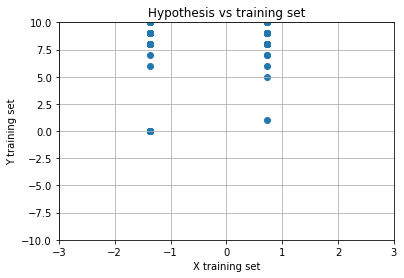

Degree:  2
(324, 26) (324, 1)


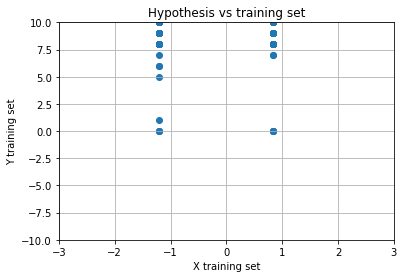

Degree:  2
(324, 26) (324, 1)


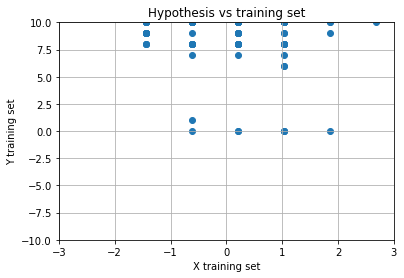

Degree:  2
(324, 26) (324, 1)


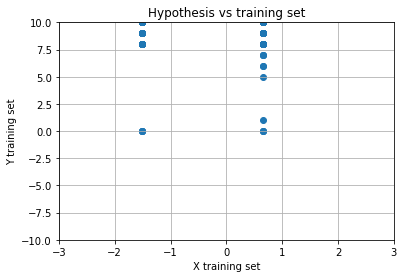

Degree:  2
(324, 26) (324, 1)


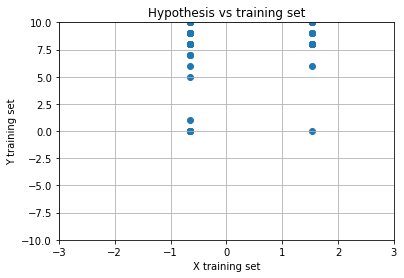

Degree:  2
(324, 26) (324, 1)


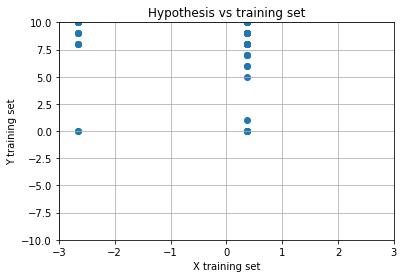

Degree:  2
(324, 26) (324, 1)


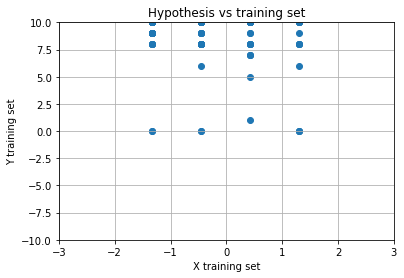

Degree:  2
(324, 26) (324, 1)


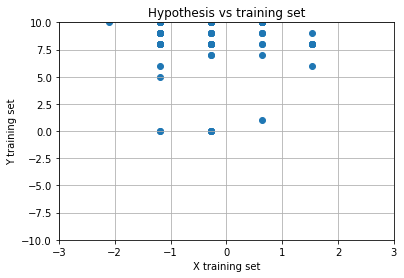

Degree:  2
(324, 26) (324, 1)


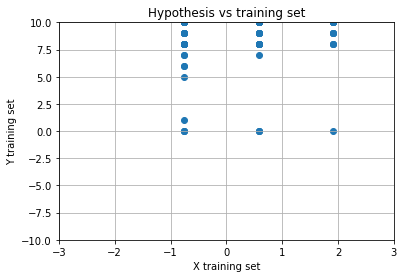

Degree:  2
(324, 26) (324, 1)


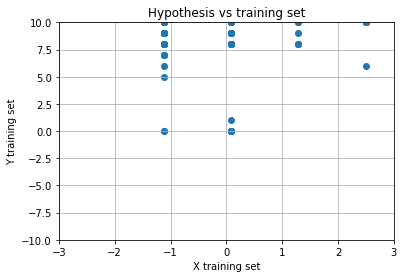

Degree:  2
(324, 26) (324, 1)


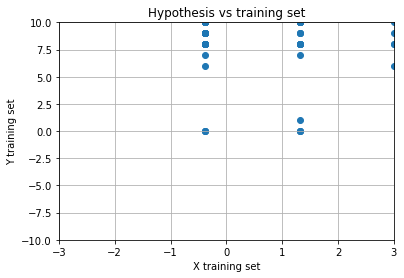

Degree:  2
(324, 26) (324, 1)


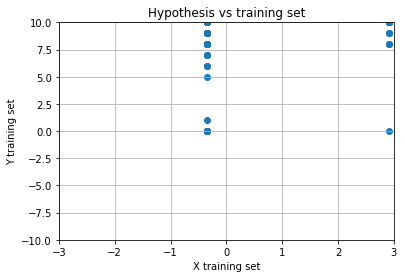

Degree:  2
(324, 26) (324, 1)


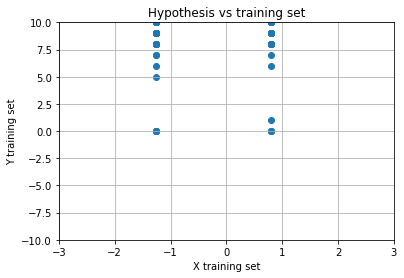

Degree:  2
(324, 26) (324, 1)


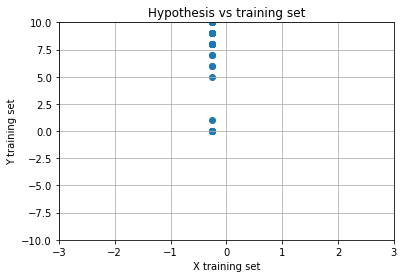

Degree:  2
(324, 26) (324, 1)


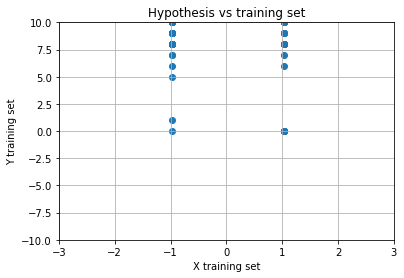

Degree:  2
(324, 26) (324, 1)


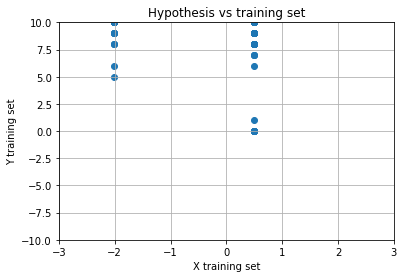

Degree:  2
(324, 26) (324, 1)


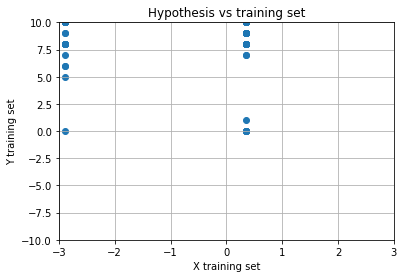

Degree:  2
(324, 26) (324, 1)


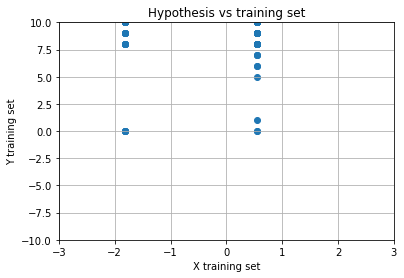

Degree:  2
(324, 26) (324, 1)


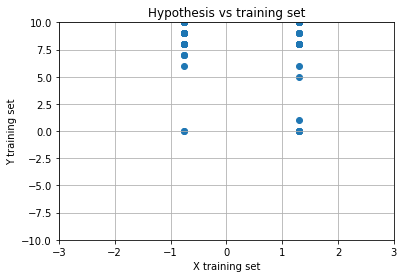

Degree:  2
(324, 26) (324, 1)


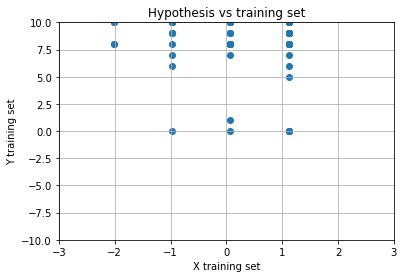

Degree:  2
(324, 26) (324, 1)


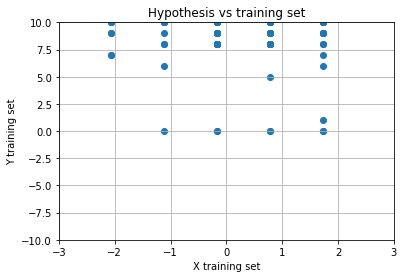

Degree:  2
(324, 26) (324, 1)


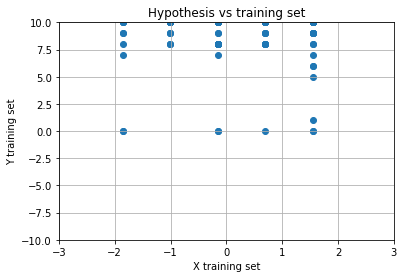

Degree:  2
(324, 26) (324, 1)


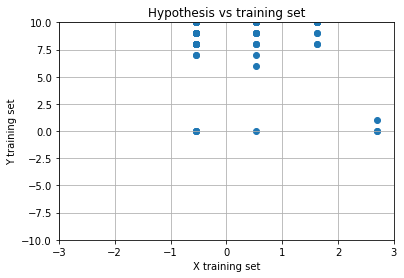

Degree:  2
(324, 26) (324, 1)


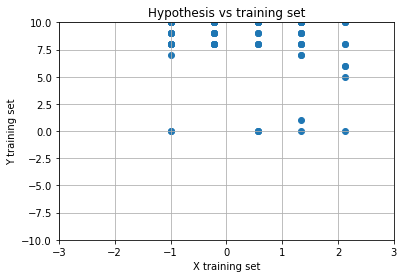

Degree:  2
(324, 26) (324, 1)


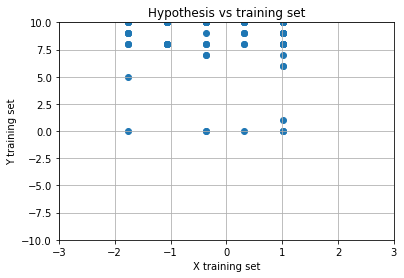

Degree:  2
(324, 26) (324, 1)


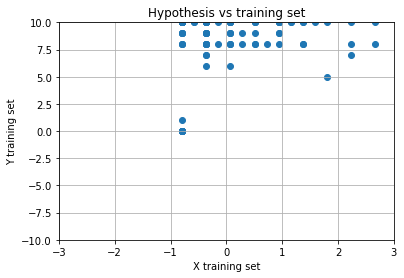

Degree:  3
(324, 26) (324, 1)


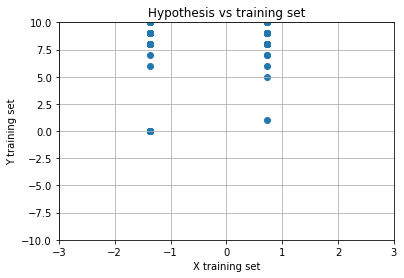

Degree:  3
(324, 26) (324, 1)


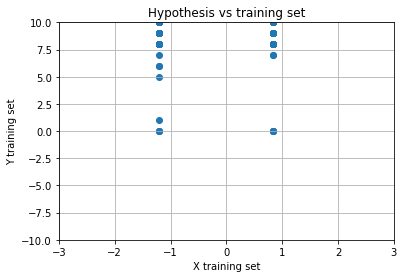

Degree:  3
(324, 26) (324, 1)


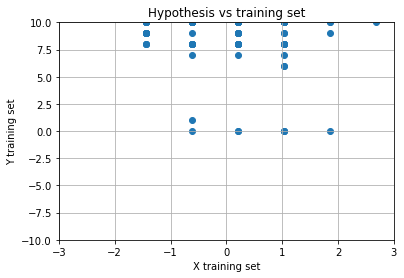

Degree:  3
(324, 26) (324, 1)


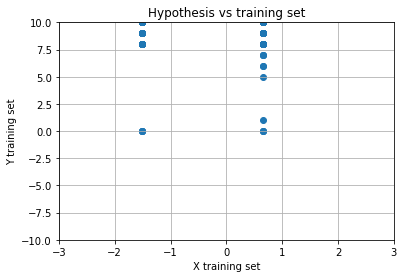

Degree:  3
(324, 26) (324, 1)


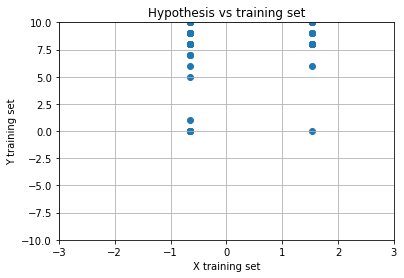

Degree:  3
(324, 26) (324, 1)


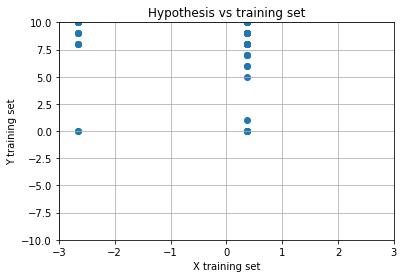

Degree:  3
(324, 26) (324, 1)


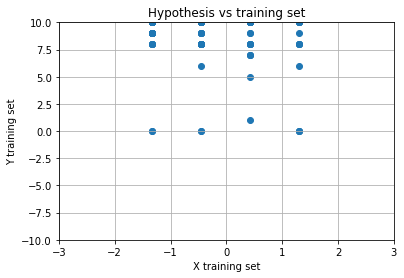

Degree:  3
(324, 26) (324, 1)


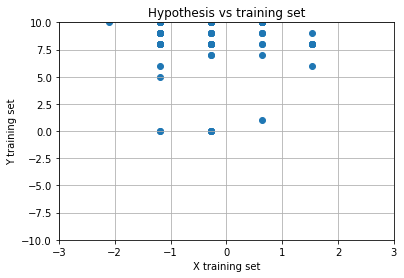

Degree:  3
(324, 26) (324, 1)


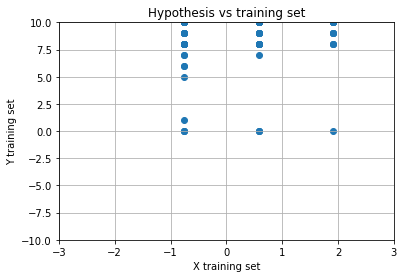

Degree:  3
(324, 26) (324, 1)


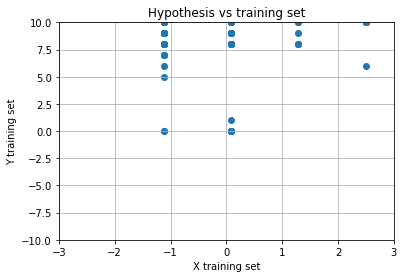

Degree:  3
(324, 26) (324, 1)


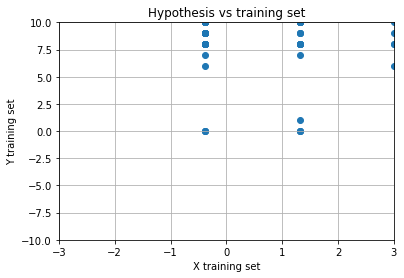

Degree:  3
(324, 26) (324, 1)


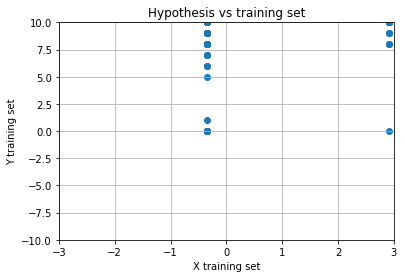

Degree:  3
(324, 26) (324, 1)


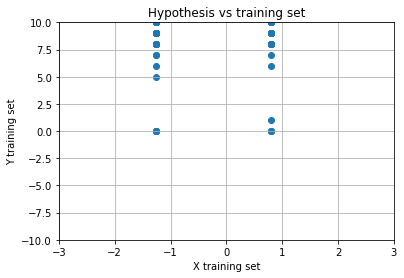

Degree:  3
(324, 26) (324, 1)


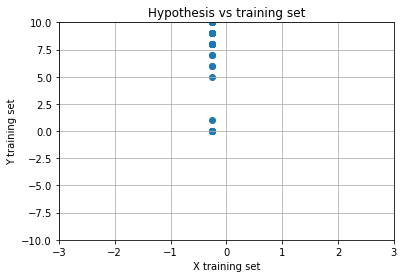

Degree:  3
(324, 26) (324, 1)


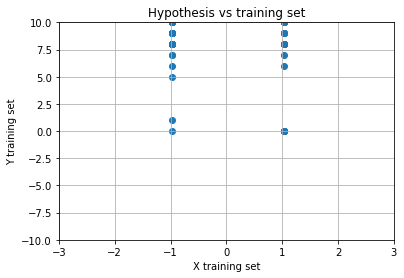

Degree:  3
(324, 26) (324, 1)


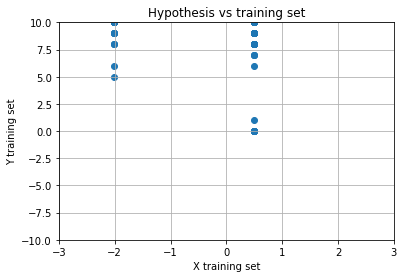

Degree:  3
(324, 26) (324, 1)


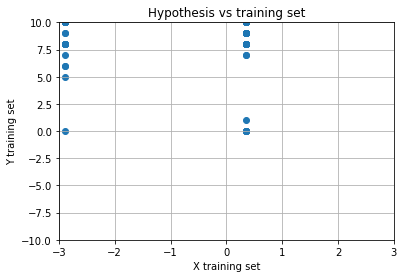

Degree:  3
(324, 26) (324, 1)


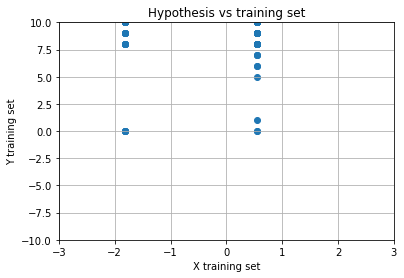

Degree:  3
(324, 26) (324, 1)


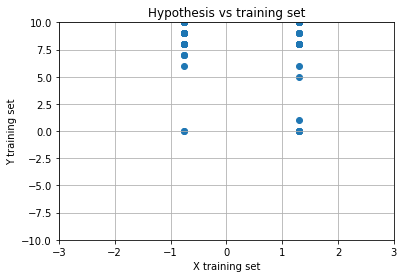

Degree:  3
(324, 26) (324, 1)


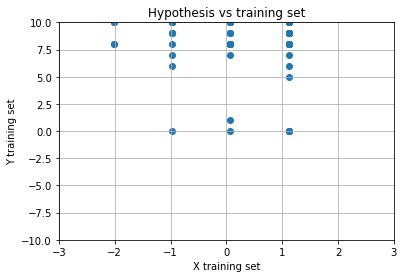

Degree:  3
(324, 26) (324, 1)


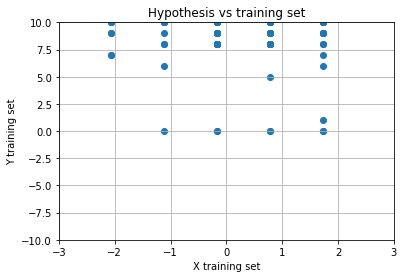

Degree:  3
(324, 26) (324, 1)


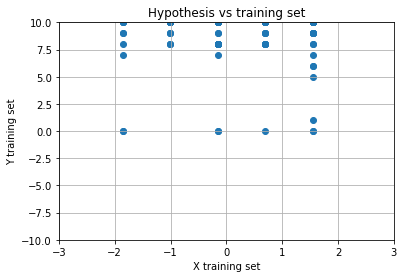

Degree:  3
(324, 26) (324, 1)


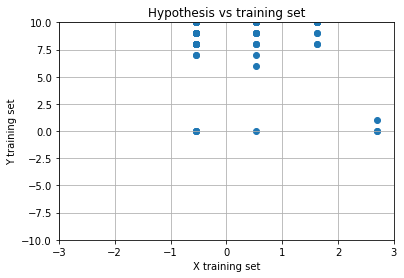

Degree:  3
(324, 26) (324, 1)


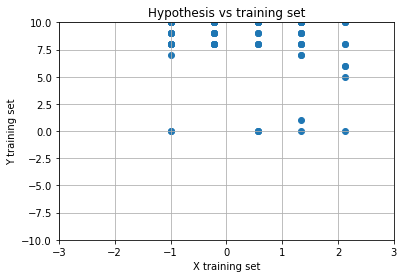

Degree:  3
(324, 26) (324, 1)


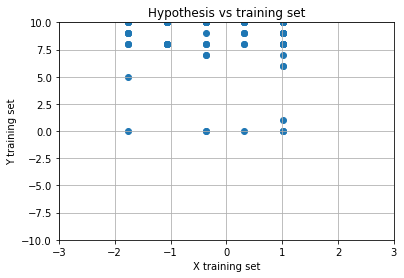

Degree:  3
(324, 26) (324, 1)


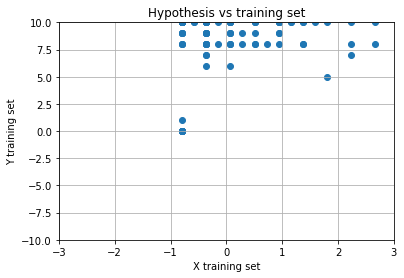

Degree:  4
(324, 26) (324, 1)


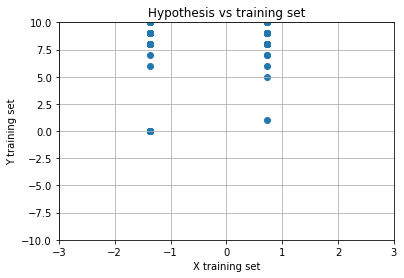

Degree:  4
(324, 26) (324, 1)


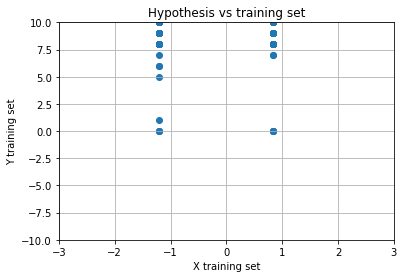

Degree:  4
(324, 26) (324, 1)


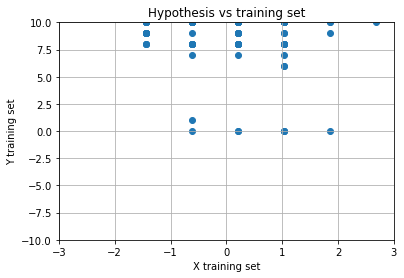

Degree:  4
(324, 26) (324, 1)


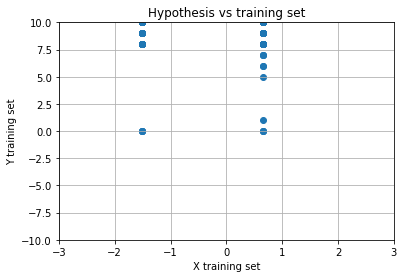

Degree:  4
(324, 26) (324, 1)


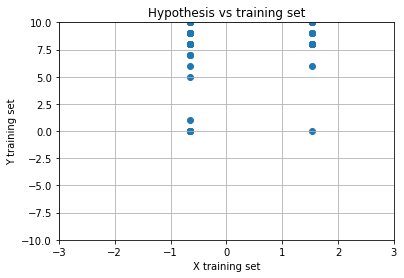

Degree:  4
(324, 26) (324, 1)


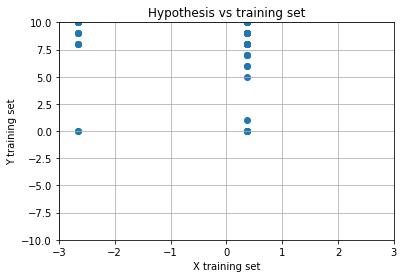

Degree:  4
(324, 26) (324, 1)


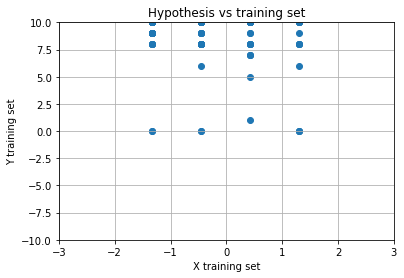

Degree:  4
(324, 26) (324, 1)


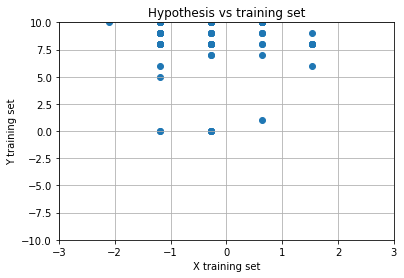

Degree:  4
(324, 26) (324, 1)


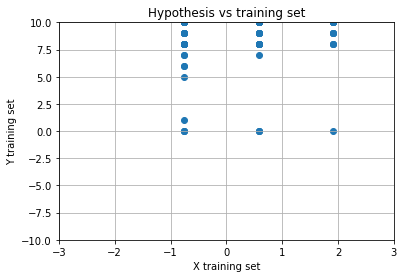

Degree:  4
(324, 26) (324, 1)


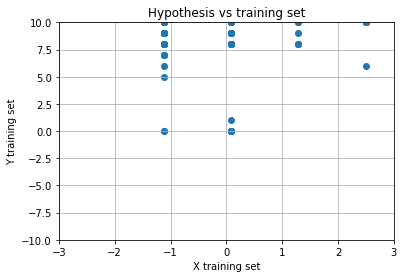

Degree:  4
(324, 26) (324, 1)


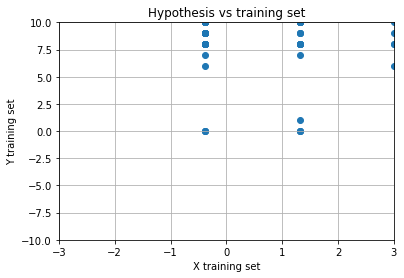

Degree:  4
(324, 26) (324, 1)


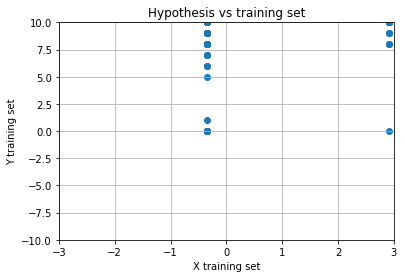

Degree:  4
(324, 26) (324, 1)


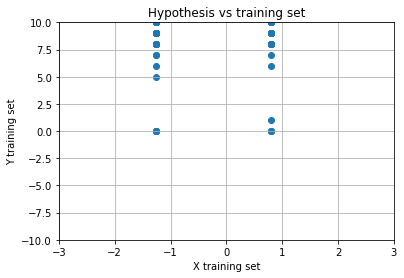

Degree:  4
(324, 26) (324, 1)


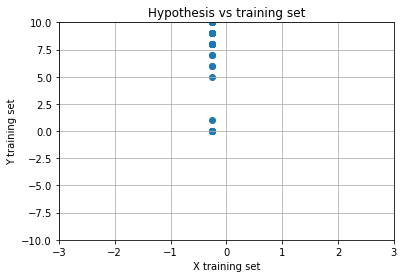

Degree:  4
(324, 26) (324, 1)


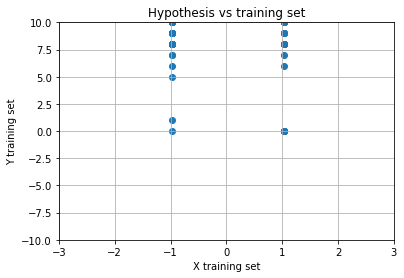

Degree:  4
(324, 26) (324, 1)


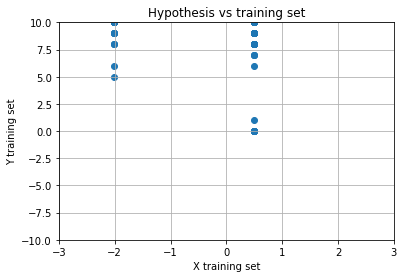

Degree:  4
(324, 26) (324, 1)


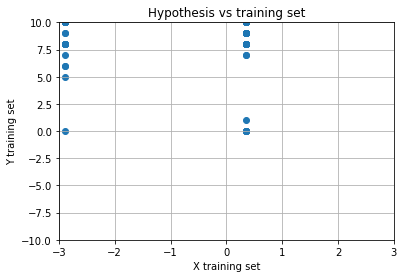

Degree:  4
(324, 26) (324, 1)


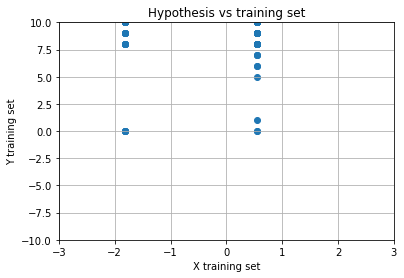

Degree:  4
(324, 26) (324, 1)


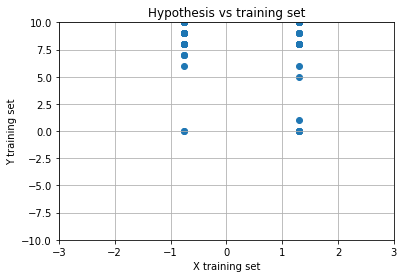

Degree:  4
(324, 26) (324, 1)


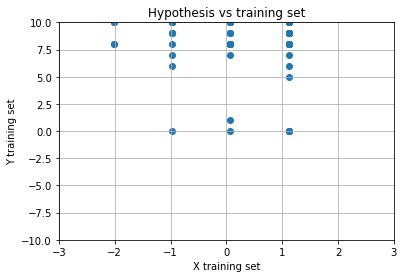

Degree:  4
(324, 26) (324, 1)


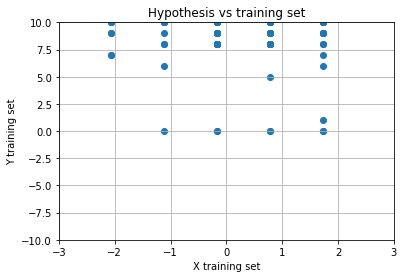

Degree:  4
(324, 26) (324, 1)


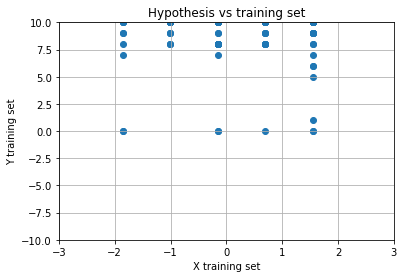

Degree:  4
(324, 26) (324, 1)


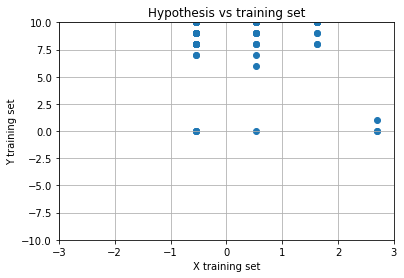

Degree:  4
(324, 26) (324, 1)


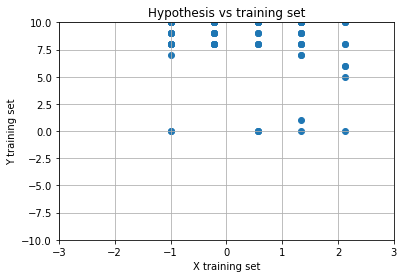

Degree:  4
(324, 26) (324, 1)


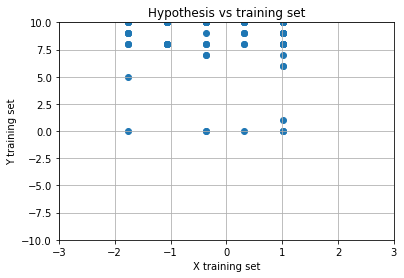

Degree:  4
(324, 26) (324, 1)


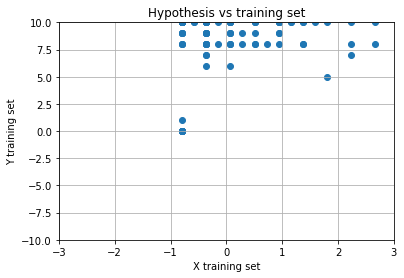

Degree:  5
(324, 26) (324, 1)


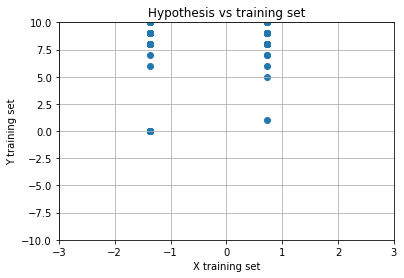

Degree:  5
(324, 26) (324, 1)


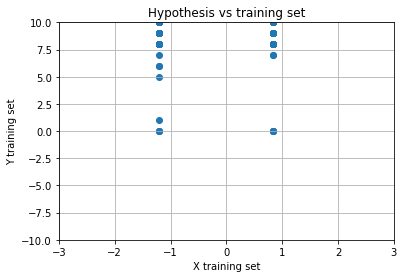

Degree:  5
(324, 26) (324, 1)


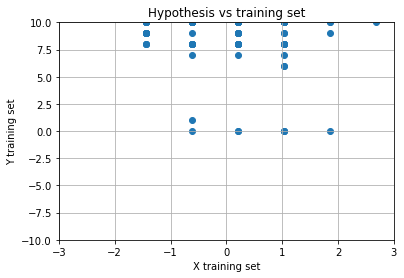

Degree:  5
(324, 26) (324, 1)


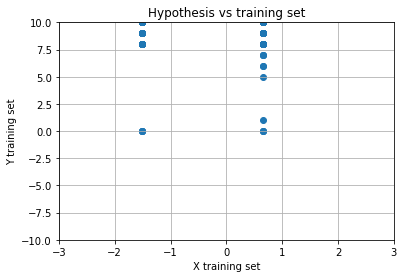

Degree:  5
(324, 26) (324, 1)


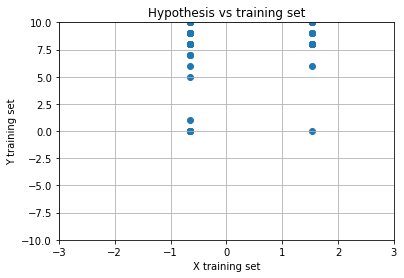

Degree:  5
(324, 26) (324, 1)


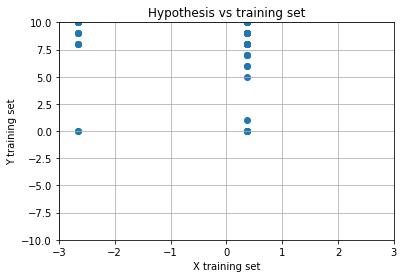

Degree:  5
(324, 26) (324, 1)


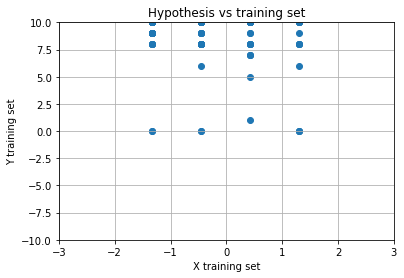

Degree:  5
(324, 26) (324, 1)


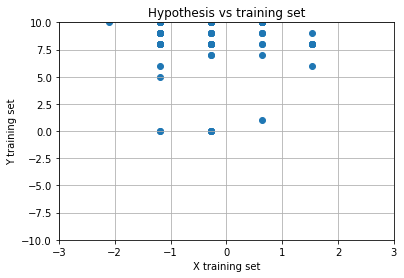

Degree:  5
(324, 26) (324, 1)


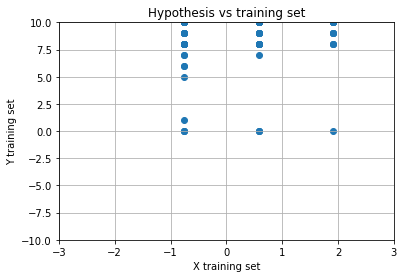

Degree:  5
(324, 26) (324, 1)


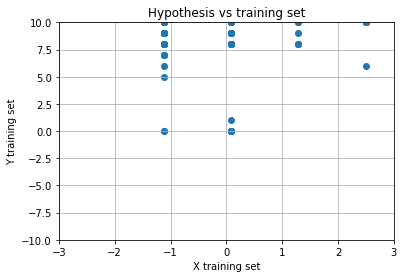

Degree:  5
(324, 26) (324, 1)


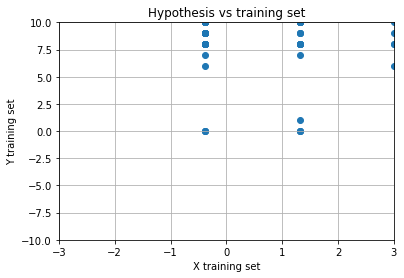

Degree:  5
(324, 26) (324, 1)


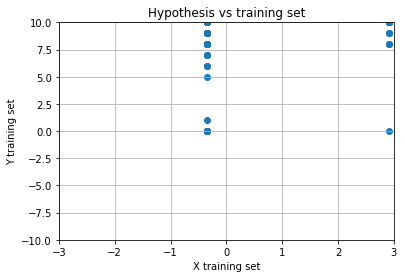

Degree:  5
(324, 26) (324, 1)


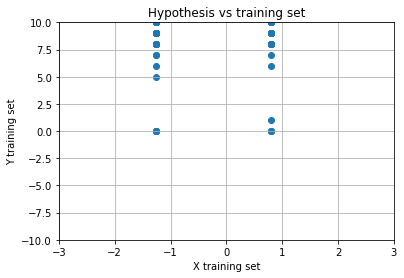

Degree:  5
(324, 26) (324, 1)


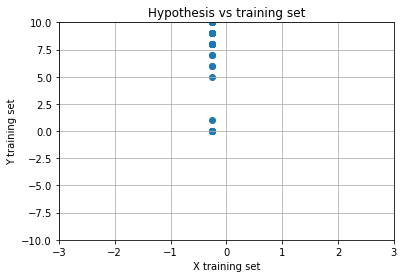

Degree:  5
(324, 26) (324, 1)


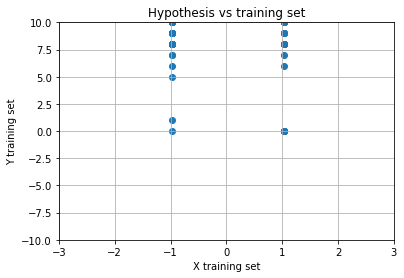

Degree:  5
(324, 26) (324, 1)


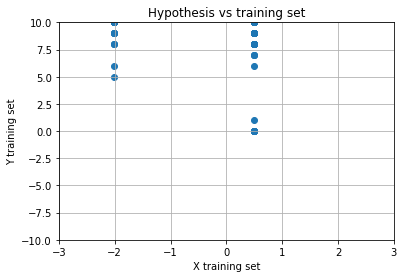

Degree:  5
(324, 26) (324, 1)


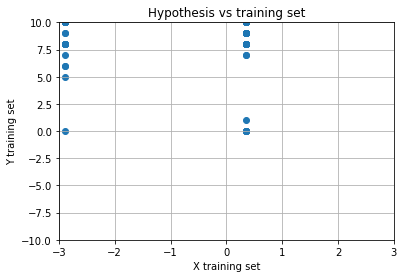

Degree:  5
(324, 26) (324, 1)


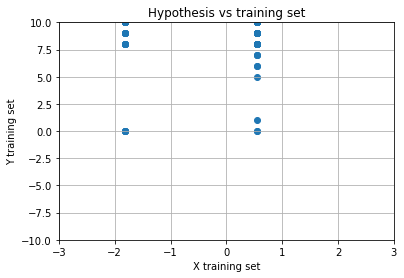

Degree:  5
(324, 26) (324, 1)


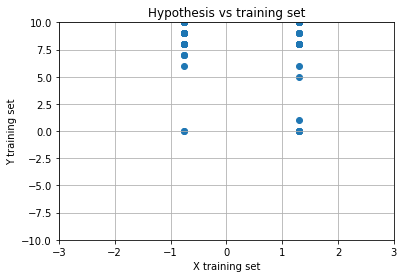

Degree:  5
(324, 26) (324, 1)


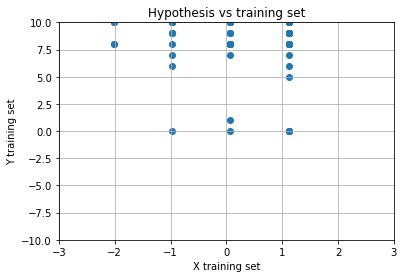

Degree:  5
(324, 26) (324, 1)


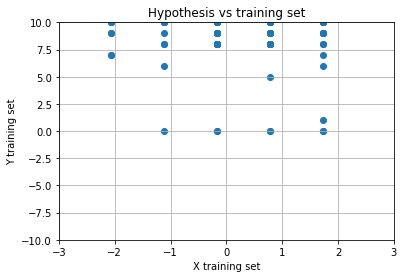

Degree:  5
(324, 26) (324, 1)


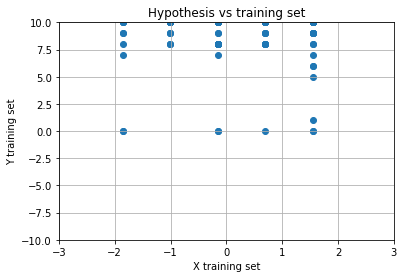

Degree:  5
(324, 26) (324, 1)


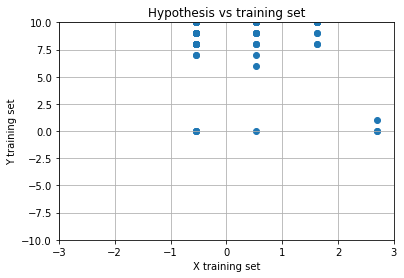

Degree:  5
(324, 26) (324, 1)


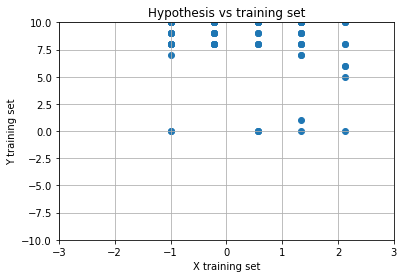

Degree:  5
(324, 26) (324, 1)


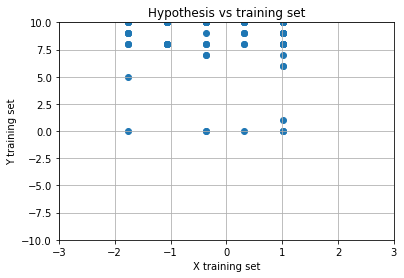

Degree:  5
(324, 26) (324, 1)


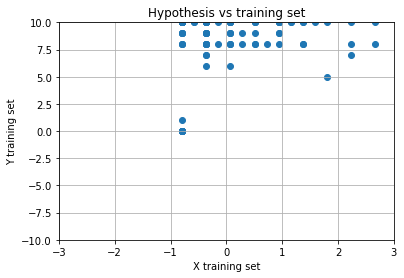

In [82]:
for d in model_degree:
    for i in range(X_poly_train.shape[1]):
        print('Degree: ', d)
        # Plot data
        print(X_poly_train.shape, y_poly_train.shape)
        plt.scatter(X_poly_train[:,i], y_poly_train)
        plt.title("Hypothesis vs training set")
        plt.xlabel("X training set")
        plt.ylabel("Y training set")
        plt.xlim(-3,3)
        plt.ylim(-10,10)
        xp = np.linspace(-1,1,200)
        yp_hat = poly.polyval(xp, theta_dict[d])
        # Plot hypothesis
        plt.plot(xp, yp_hat, color = "Orange")
        plt.grid(True)
        plt.show(block=False)